# Nearest neighbour

In [3]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import random
colormap='winter'

## <font color='red'>TODO:</font> Generate Dataset

Let y = 1 be the class of points that have distance at most 1 from the origin and let y = 0 bet the class of points that have distance at least 1 from the origin (but at most 10).

Create randomly 20 point of the class y = 1 and 40 points of the class y = -1.

Hint: You can use np.append(A,B,axis=0) to merge two numpy arrays A and B.

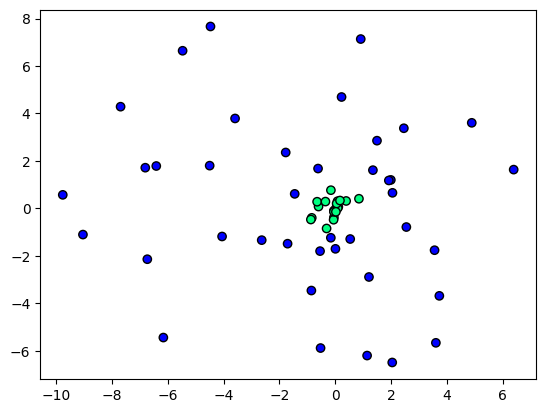

In [5]:
def generate_points_in_ring(n_samples,r_min,r_max):
  """This method generates n_samples many random points that have distance at least r_min from the origin but at most r_max."""
  X = np.array([])
  for i in range(n_samples):
    angle = random.random() *2 * np.pi
    radius = r_min + random.random() * (r_max-r_min)
    X=np.append(X,[radius*np.sin(angle),radius*np.cos(angle)])
  return X.reshape((n_samples,2))

X = np.append(generate_points_in_ring(20,0,1),generate_points_in_ring(40,1,10),axis=0)
y = np.append(np.ones(20),np.zeros(40))

plt.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colormap)
plt.show()



## Let's try k-nearest neighbour with a couple of different k

First, some code to plot the decision boundary.

In [6]:
resolution=500
L1=np.linspace(np.min(X[:,0])-0.5,np.max(X[:,0])+0.5,num=resolution)
L2=np.linspace(np.min(X[:,1])-0.5,np.max(X[:,1])+0.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

k-nearest neighbours is implemented in scikit-learn, so it's easy to use.  

In [7]:
from sklearn.neighbors import KNeighborsClassifier
one_nn=KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Let's set up a short function to plot the decision boundary in order to avoid code repetition.

In [8]:
def plot_decision_boundary(nn_classifier):
    Z=nn_classifier.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    plt.contourf(XX,YY,Z,alpha=0.5,cmap=colormap)
    markers=['o','P','v','^','<','>','s','*','X']
    for i,c in enumerate(set(y)):
        XXX=[x for x,y in zip(X[:,0],y) if y==c]
        YYY=[x for x,y in zip(X[:,1],y) if y==c]
        plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])
    plt.show()  

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


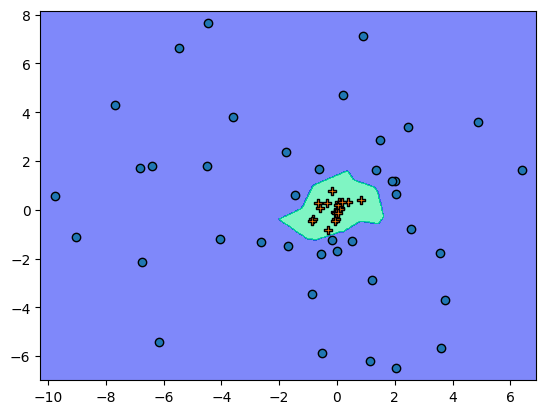

In [9]:
plot_decision_boundary(one_nn)

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


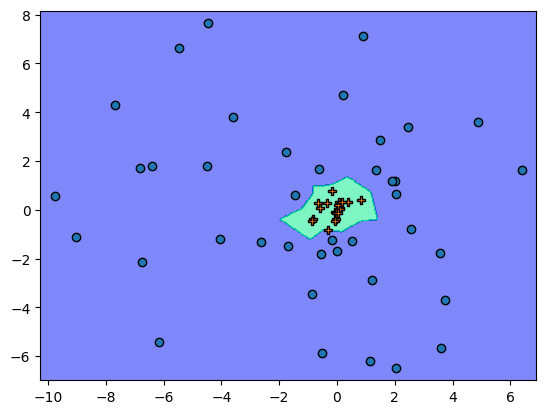

In [10]:
two_nn=KNeighborsClassifier(n_neighbors=2)
two_nn.fit(X,y)
plot_decision_boundary(two_nn)

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


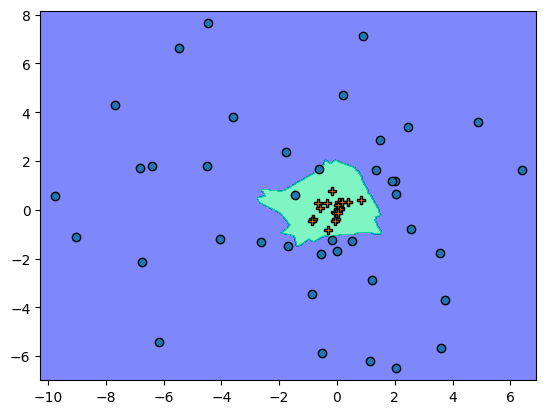

In [11]:
five_nn=KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X,y)
plot_decision_boundary(five_nn)

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


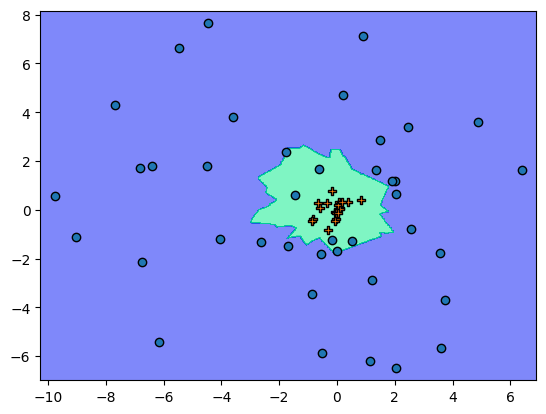

In [12]:
ten_nn=KNeighborsClassifier(n_neighbors=10)
ten_nn.fit(X,y)
plot_decision_boundary(ten_nn)

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


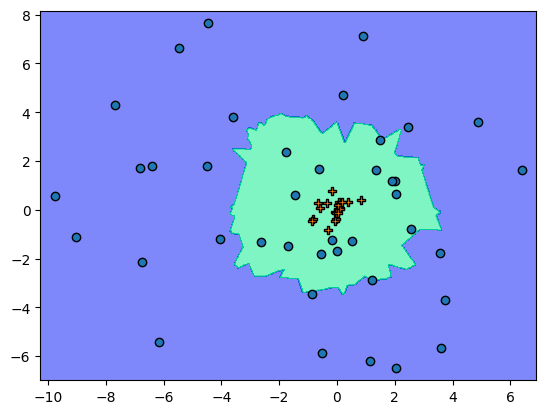

In [13]:
twenty_nn=KNeighborsClassifier(n_neighbors=20)
twenty_nn.fit(X,y)
plot_decision_boundary(twenty_nn)

/tmp/ipykernel_1452/834742861.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(XXX,YYY,edgecolor='black',cmap=colormap,marker=markers[i])


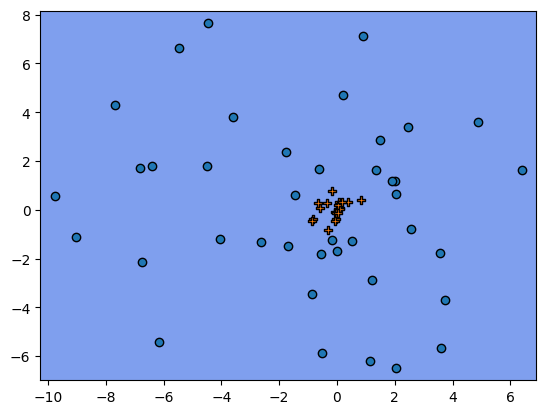

In [14]:
fifty_nn=KNeighborsClassifier(n_neighbors=50)
fifty_nn.fit(X,y)
plot_decision_boundary(fifty_nn)